<a href="https://colab.research.google.com/github/VectorJamo/ML-Algorithms-From-Scratch/blob/main/Linear_Regression_From_Ground_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
# Implementing linear regression from scratch.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
# A linear regression model finds the line of best fit in n-dimensional space
# The equation of this line in 2D is y = wx + b
# In n-dimensional space, the equation is, y = w1(x1) + w2(x2) + w3(x3) + .... + w(n-1)x(n-1) + b

def get_prediction(feature_vector, weight_vector, bias):
  prediction = np.dot(feature_vector, weight_vector) + bias
  return prediction

In [173]:
# It is our goal now to find the appropriate values of the weights and bias such that the cost of each training is minimized.
# The cost function is the sum of the mean squared error(MSE) over the training data.
# C = sum over the entire dataset(y(i) - ((w)x(i) + b))^2
# Here, i = iterator going from 1 to N where N is the no. of data examples in the dataset. Each data example is a pair of (feature vector, output label)
# x(i) is the feature vector, w is the weight vector, b is the bias and y(i) is the actual label for that training data.
# Hence, this equation can be reduced as the square of the difference of the actual label and the predicted label by the model.
# We wish to decrease the this value of the cost function overtime during training. Lesser the difference, we can see that better is our model is predicting
# values that are closer to the actual values which is what we want.

def get_average_training_cost(feature_vectors, output_labels, weight_vector, bias):
  training_size = len(feature_vectors)
  training_cost = 0
  for i in range(0, training_size):
    training_cost += (output_labels[i] - (np.dot(feature_vectors[i], weight_vector) + bias))**2

  return training_cost/training_size

In [174]:
# Implement Gradient Descent
# Gradient Descent is a way of nudging the weights and biases in such a way that the cost of the the training decreases.
# It consists of finding the gradient vector that points to the direction in which the function is decreasing and then taking steps in that direction.
# When this process is done for many many times, we will eventually reach a local minimum where the cost function is minimized.

# The equation for getting the derivative of the cost function with respect to the weight dC/dw is just the partial derivative of the cost function with
# respect to the weight vector. Computing the partial derivative is trivial and can be done with a pen and paper.
def get_weight_gradient(feature_vectors, output_labels, weight_vector, bias): # Returns dC/dw
  weight_gradient = np.zeros(len(weight_vector))
  training_size = len(feature_vectors)
  for i in range(0, training_size):
    weight_gradient += (-2 * (output_labels[i] - (np.dot(feature_vectors[i], weight_vector) + bias))) * feature_vectors[i]

  return weight_gradient/training_size

def get_bias_gradient(feature_vectors, output_labels, weight_vector, bias): # Returns dC/db
  bias_gradient = 0
  training_size = len(feature_vectors)
  for i in range(0, training_size):
    bias_gradient += ((-2 * (output_labels[i] - (np.dot(feature_vectors[i], weight_vector) + bias))))

  return bias_gradient/training_size

def perform_gradient_descent(feature_vectors, output_labels, weight_vector, bias):
  dw = get_weight_gradient(feature_vectors, output_labels, weight_vector, bias)
  db = get_bias_gradient(feature_vectors, output_labels, weight_vector, bias)
  learning_rate = 0.05

  weight_vector -= learning_rate * dw
  bias -= learning_rate * db

In [175]:
class LRParameters():
  def __init__(self):
    self.weights = 0
    self.bias = 0

def train(feature_vectors, output_labels, epochs):
  model_parameters = LRParameters()

  # Initial model parameters
  np.random.seed(40)
  model_parameters.weights = np.random.rand(len(feature_vectors[0]))
  model_parameters.bias = np.random.rand(1)
  print(f'Initial weights: {model_parameters.weights}')
  print(f'Initial bias: {model_parameters.bias}')

  for i in range(0, epochs):
    # Calculate the training cost
    training_cost = get_average_training_cost(feature_vectors, output_labels, model_parameters.weights, model_parameters.bias)

    # Perform gradient descent
    perform_gradient_descent(feature_vectors, output_labels, model_parameters.weights, model_parameters.bias)

    if i%10 == 0:
      print(f'Training round: {i}. Training cost: {training_cost}')
      print(f'Weights: {model_parameters.weights}. Bias: {model_parameters.bias}')
      print('-------------------------------------------------------------------')

  return model_parameters


In [176]:
# Dataset
feature_vectors = [[1], [2], [3], [4], [5]]
output_labels = [[2], [4], [6], [8], [10]]
epochs = 100

In [177]:
model = train(feature_vectors, output_labels, epochs)
print(f'New weights: {model.weights}')
print(f'New bias: {model.bias}')

Initial weights: [0.40768703]
Initial bias: [0.05536604]
Training round: 0. Training cost: [27.36417162]
Weights: [2.14262149]. Bias: [0.52752333]
-------------------------------------------------------------------
Training round: 10. Training cost: [0.02751073]
Weights: [1.8941369]. Bias: [0.38219942]
-------------------------------------------------------------------
Training round: 20. Training cost: [0.01956201]
Weights: [1.91073106]. Bias: [0.32228919]
-------------------------------------------------------------------
Training round: 30. Training cost: [0.01390993]
Weights: [1.92472408]. Bias: [0.27176996]
-------------------------------------------------------------------
Training round: 40. Training cost: [0.00989091]
Weights: [1.93652367]. Bias: [0.22916968]
-------------------------------------------------------------------
Training round: 50. Training cost: [0.00703312]
Weights: [1.94647367]. Bias: [0.19324705]
----------------------------------------------------------------

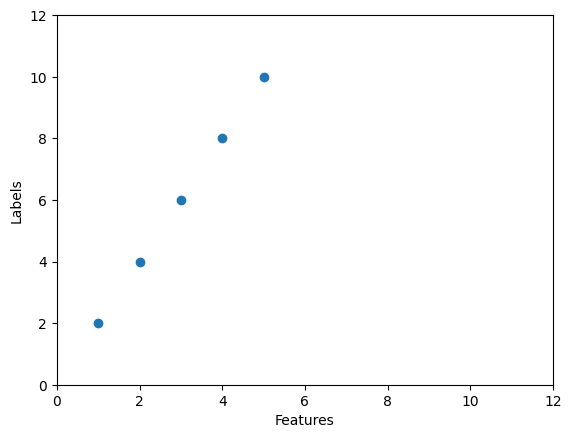

In [179]:
# Visualize
plt.axis([0, 12, 0, 12])
plt.xlabel('Features')
plt.ylabel('Labels')
plt.scatter(feature_vectors, output_labels)